In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from PIL import Image
from collections import defaultdict

# Original Images

In [ ]:
dataset_path = "Original"

classes = ["Benign", "Early", "Pre", "Pro"]

image_counts = {}
image_paths = defaultdict(list)

for cls in classes:
    folder = os.path.join(dataset_path, cls)
    files = [f for f in os.listdir(folder) if f.endswith(".jpg") or f.endswith(".png")]
    image_counts[cls] = len(files)
    image_paths[cls] = [os.path.join(folder, f) for f in files]

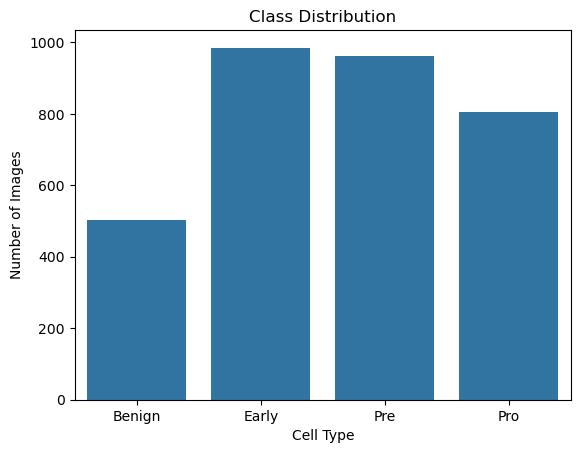

In [ ]:
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.xlabel("Cell Type")
plt.show()

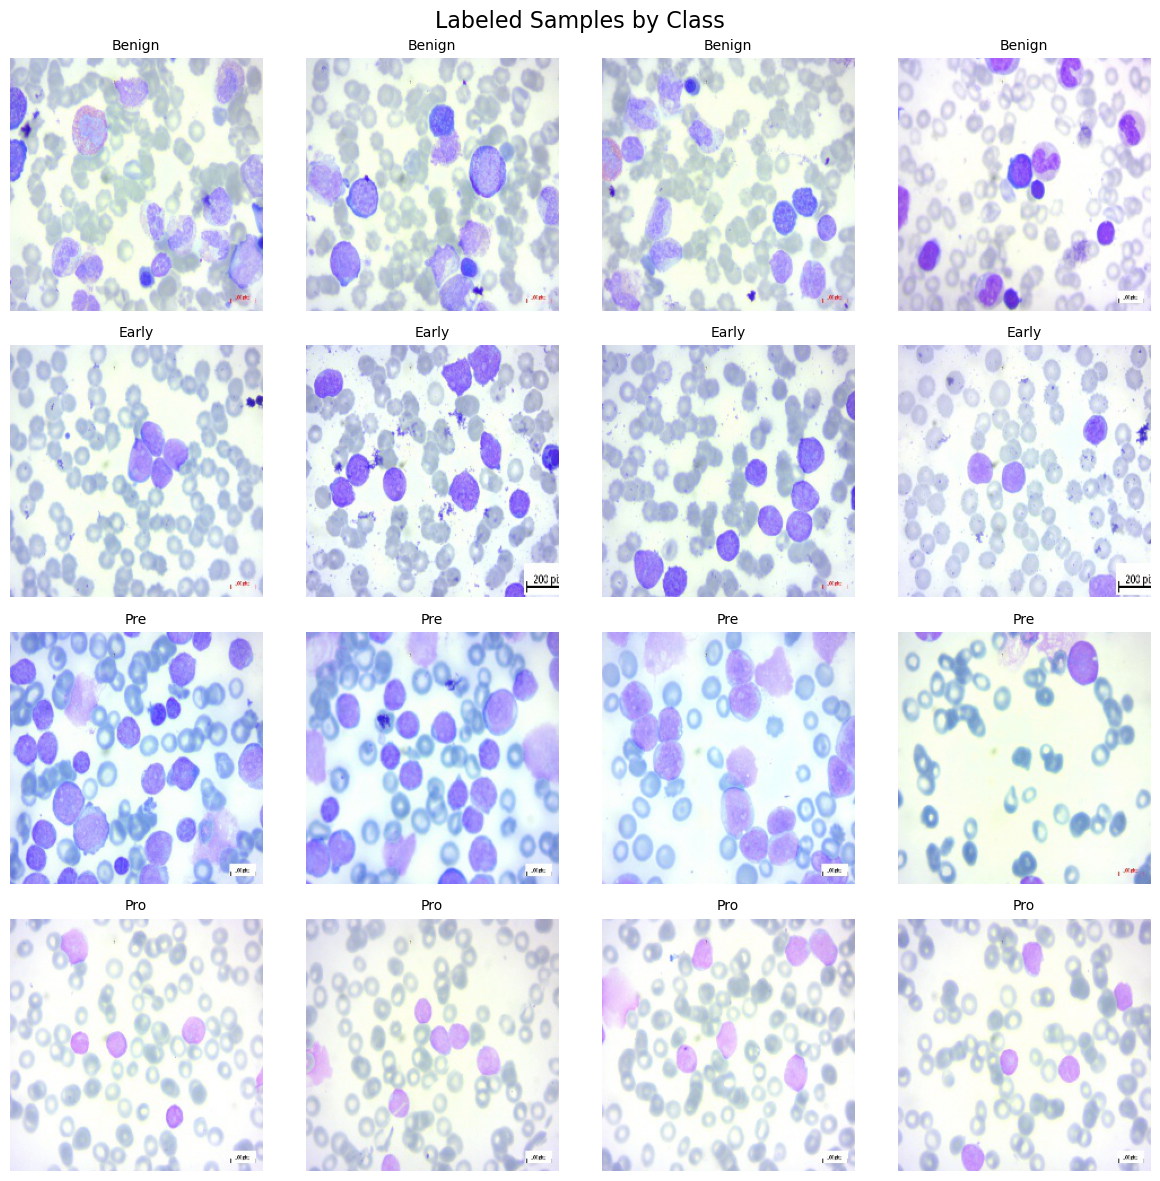

In [ ]:
def show_sample_images_with_labels(image_paths, classes, num_images=4):
    fig, axs = plt.subplots(len(classes), num_images, figsize=(num_images * 3, len(classes) * 3))

    for i, cls in enumerate(classes):
        for j in range(num_images):
            img_path = image_paths[cls][j]
            img = Image.open(img_path)

            ax = axs[i, j] if num_images > 1 else axs[i]
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{cls}", fontsize=10)

    plt.suptitle("Labeled Samples by Class", fontsize=16)
    plt.tight_layout()
    plt.show()

show_sample_images_with_labels(image_paths, classes)

In [ ]:
sample_shapes = []

for cls in classes:
    img_path = image_paths[cls][0]
    img = Image.open(img_path)
    sample_shapes.append((cls, img.size))

for cls, shape in sample_shapes:
    print(f"{cls}: image size = {shape}")

Benign: image size = (224, 224)
Early: image size = (224, 224)
Pre: image size = (224, 224)
Pro: image size = (224, 224)


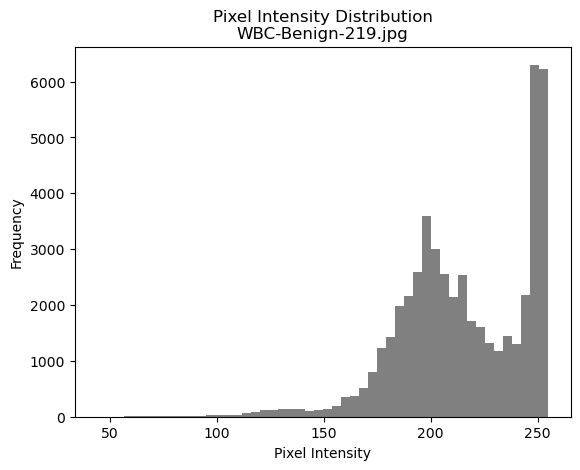

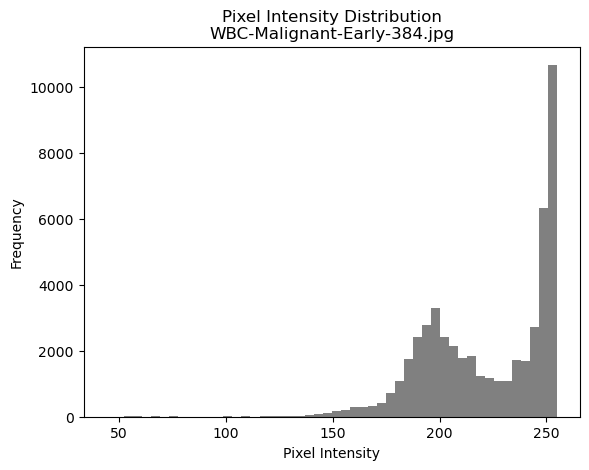

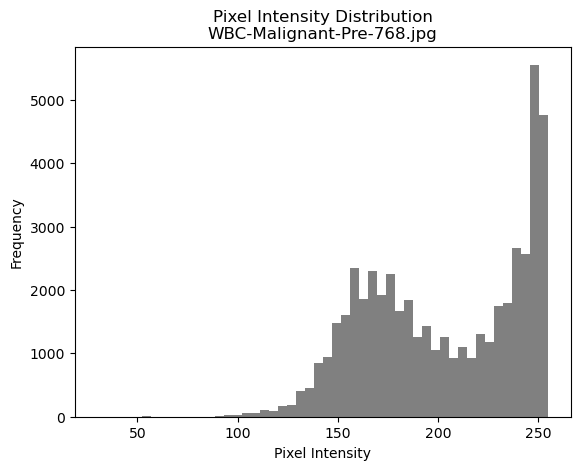

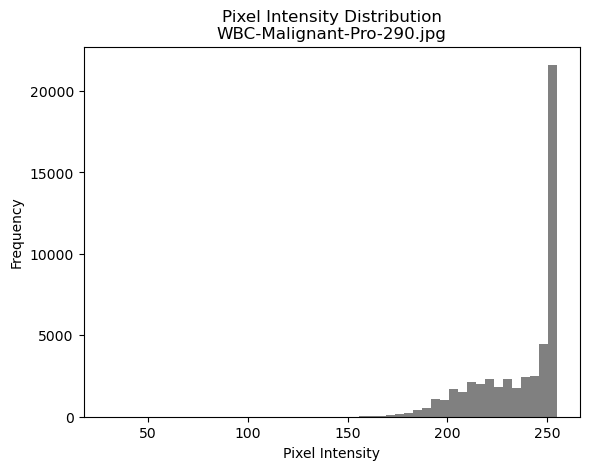

In [ ]:
def plot_intensity_histogram(img_path):
    img = Image.open(img_path).convert("L")
    pixels = np.array(img).flatten()

    plt.hist(pixels, bins=50, color='gray')
    plt.title(f"Pixel Intensity Distribution\n{os.path.basename(img_path)}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

for cls in classes:
    plot_intensity_histogram(image_paths[cls][0])


In [ ]:
def compute_rgb_means(image_list):
    means = []
    for path in image_list[:50]:  # Sample
        img = Image.open(path)
        img_array = np.array(img) / 255.0
        means.append(img_array.mean(axis=(0, 1)))  # per channel
    return np.mean(means, axis=0)

for cls in classes:
    r, g, b = compute_rgb_means(image_paths[cls])
    print(f"{cls}: R={r:.3f}, G={g:.3f}, B={b:.3f}")


Benign: R=0.844, G=0.861, B=0.918
Early: R=0.815, G=0.849, B=0.932
Pre: R=0.759, G=0.806, B=0.955
Pro: R=0.909, G=0.914, B=0.947


# Segmented Images

In [ ]:
dataset_path = "Segmented"

classes = ["Benign", "Early", "Pre", "Pro"]

image_counts = {}
image_paths = defaultdict(list)

for cls in classes:
    folder = os.path.join(dataset_path, cls)
    files = [f for f in os.listdir(folder) if f.endswith(".jpg") or f.endswith(".png")]
    image_counts[cls] = len(files)
    image_paths[cls] = [os.path.join(folder, f) for f in files]

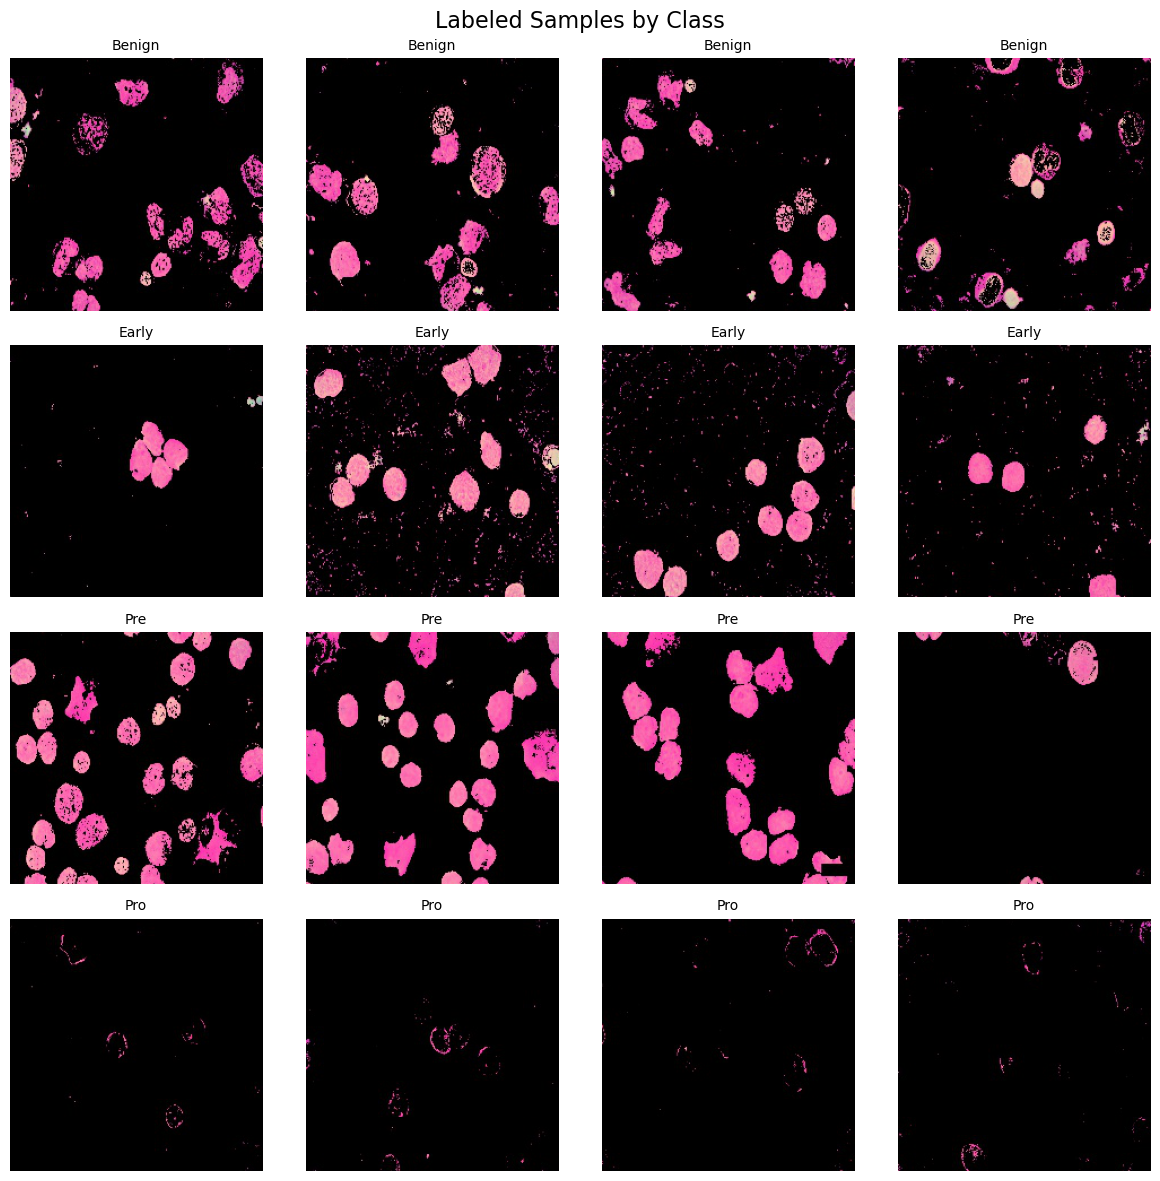

In [ ]:
def show_sample_images_with_labels(image_paths, classes, num_images=4):
    fig, axs = plt.subplots(len(classes), num_images, figsize=(num_images * 3, len(classes) * 3))

    for i, cls in enumerate(classes):
        for j in range(num_images):
            img_path = image_paths[cls][j]
            img = Image.open(img_path)

            ax = axs[i, j] if num_images > 1 else axs[i]
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{cls}", fontsize=10)

    plt.suptitle("Labeled Samples by Class", fontsize=16)
    plt.tight_layout()
    plt.show()

show_sample_images_with_labels(image_paths, classes)

In [ ]:
sample_shapes = []

for cls in classes:
    img_path = image_paths[cls][0]
    img = Image.open(img_path)
    sample_shapes.append((cls, img.size))

for cls, shape in sample_shapes:
    print(f"{cls}: image size = {shape}")

Benign: image size = (224, 224)
Early: image size = (224, 224)
Pre: image size = (224, 224)
Pro: image size = (224, 224)


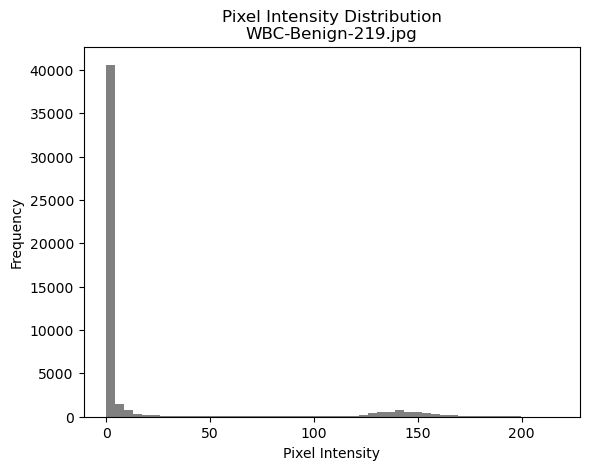

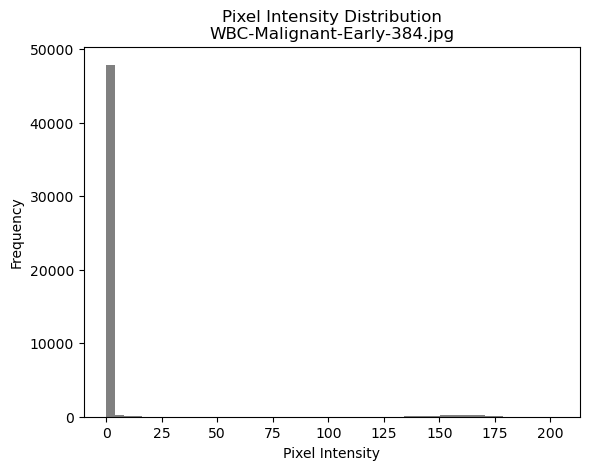

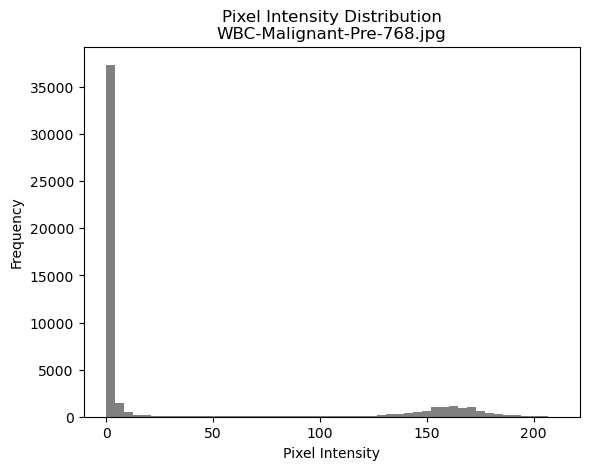

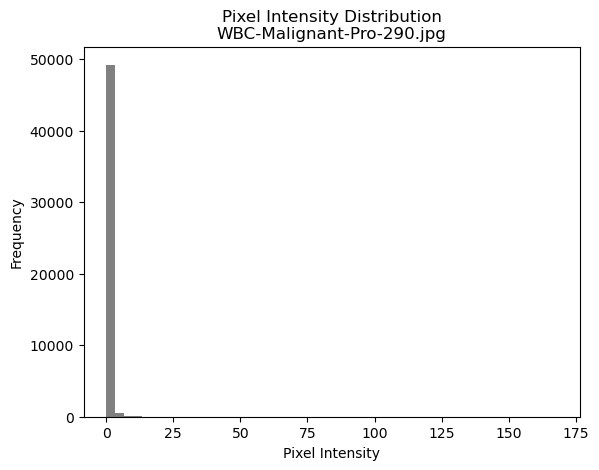

In [ ]:
def plot_intensity_histogram(img_path):
    img = Image.open(img_path).convert("L")
    pixels = np.array(img).flatten()

    plt.hist(pixels, bins=50, color='gray')
    plt.title(f"Pixel Intensity Distribution\n{os.path.basename(img_path)}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

for cls in classes:
    plot_intensity_histogram(image_paths[cls][0])

In [ ]:
def compute_rgb_means(image_list):
    means = []
    for path in image_list[:50]:  # Sample
        img = Image.open(path)
        img_array = np.array(img) / 255.0
        means.append(img_array.mean(axis=(0, 1)))  # per channel
    return np.mean(means, axis=0)

for cls in classes:
    r, g, b = compute_rgb_means(image_paths[cls])
    print(f"{cls}: R={r:.3f}, G={g:.3f}, B={b:.3f}")


Benign: R=0.068, G=0.035, B=0.049
Early: R=0.080, G=0.041, B=0.056
Pre: R=0.182, G=0.082, B=0.127
Pro: R=0.009, G=0.004, B=0.006


In [ ]:
def show_original_vs_segmented(class_name, idx=0):
    orig_path = os.path.join('Original', class_name, os.listdir(os.path.join('Original', class_name))[idx])
    seg_path = os.path.join('Segmented', class_name, os.listdir(os.path.join('Segmented', class_name))[idx])

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(Image.open(orig_path))
    axes[0].set_title("Original")
    axes[1].imshow(Image.open(seg_path))
    axes[1].set_title("Segmented")
    for ax in axes: ax.axis("off")
    plt.suptitle(f"{class_name} sample")
    plt.tight_layout()
    plt.show()


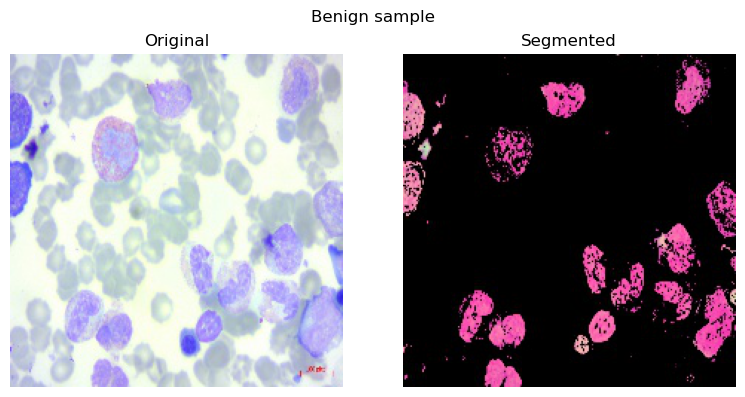

In [ ]:
show_original_vs_segmented("Benign")

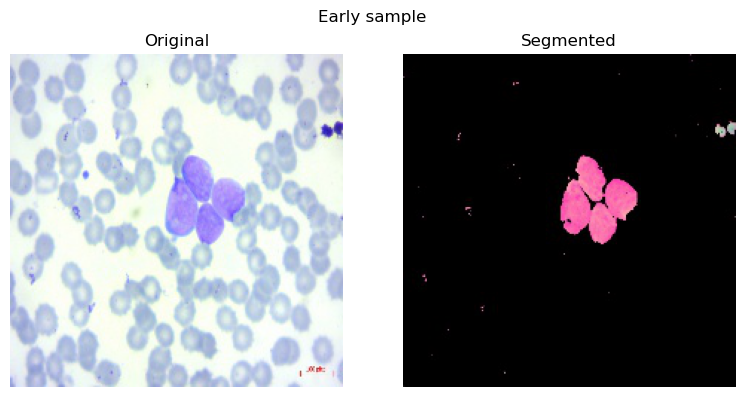

In [ ]:
show_original_vs_segmented("Early")

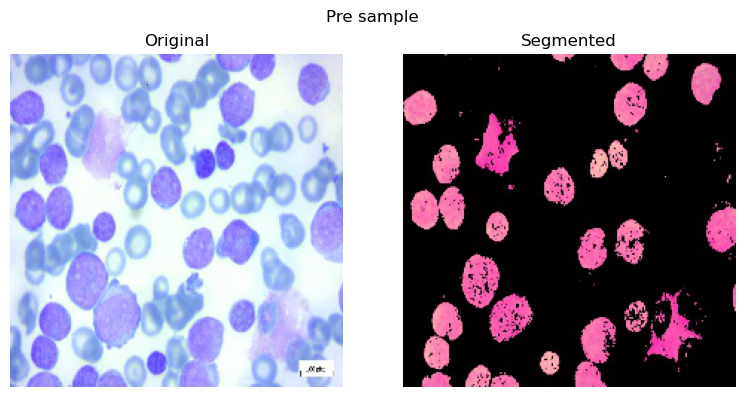

In [ ]:
show_original_vs_segmented("Pre")

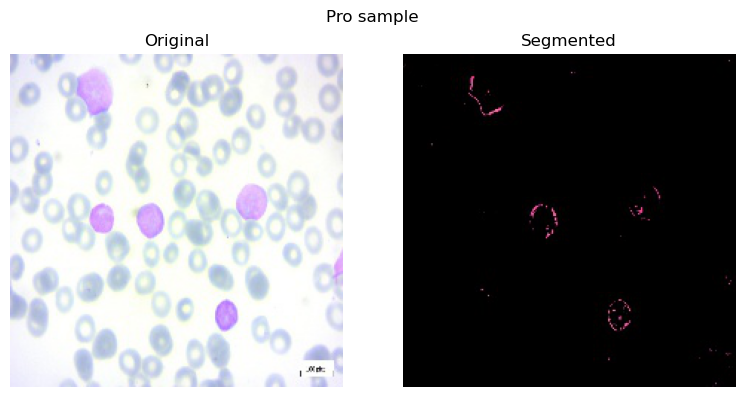

In [ ]:
show_original_vs_segmented("Pro")

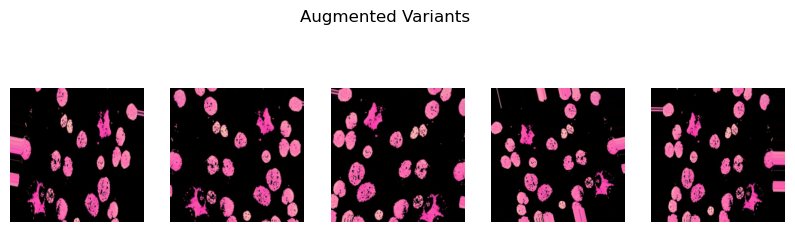

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.2, horizontal_flip=True)
img = np.expand_dims(np.array(Image.open(image_paths['Pre'][0])), axis=0)

aug_iter = datagen.flow(img)
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(next(aug_iter)[0].astype("uint8"))
    plt.axis('off')
plt.suptitle("Augmented Variants")
plt.show()


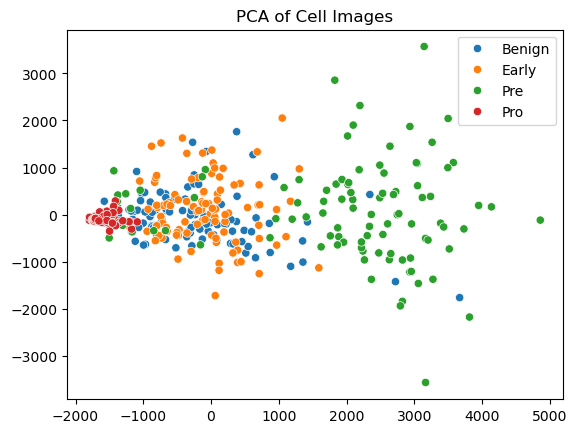

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def extract_flattened_images(image_paths, num=100):
    X, y = [], []
    for label, cls in enumerate(classes):
        for img_path in image_paths[cls][:num]:
            img = Image.open(img_path).resize((64, 64))
            X.append(np.array(img).flatten())
            y.append(cls)
    return np.array(X), np.array(y)

X_flat, y_labels = extract_flattened_images(image_paths, num=100)
X_pca = PCA(n_components=2).fit_transform(X_flat)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_labels)
plt.title("PCA of Cell Images")
plt.show()

/Users/iliyanvalani/miniconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iliyanvalani/miniconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


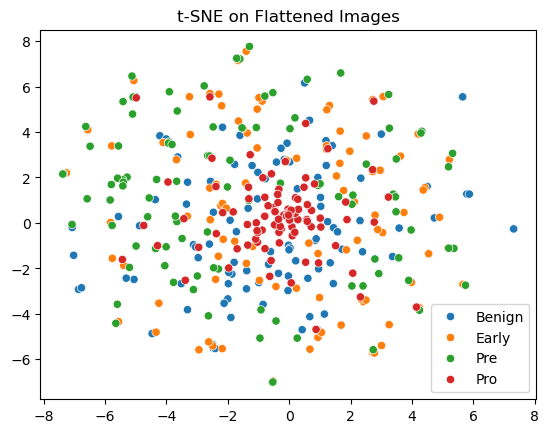

In [ ]:
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_flat)

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_labels)
plt.title("t-SNE on Flattened Images")
plt.show()